In [1]:
import cv2
import numpy as np
from numpy import *
import operator
from os import listdir
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from numpy.linalg import *
from scipy.stats.stats import pearsonr
from numpy import linalg as la
# Load an color image in grayscale
data = cv2.imread('abc.jpg',0)
print(data)
samples,features = shape(data)

[[ 58  58  58 ...,  74  74  74]
 [ 58  58  58 ...,  74  74  74]
 [ 58  58  58 ...,  74  74  74]
 ..., 
 [138 139 141 ..., 101 109 121]
 [137 133 125 ..., 116 117 113]
 [136 140 142 ..., 125 110  88]]


In [2]:
def svd(data, S=2):
     
    #calculate SVD
    U, s, V = linalg.svd( data )
    print(U)
    print()
    print(s)
    print()
    print(V)
    return U,s,V

In [3]:
U,s,V=svd(data,2)

[[ -4.69009845e-02  -3.89173883e-03  -2.59635798e-02 ...,  -1.09851664e-01
   -2.80571295e-01  -4.28842161e-01]
 [ -4.69052779e-02  -3.89299228e-03  -2.59106729e-02 ...,  -3.83932454e-01
    1.31635183e-01   2.39255101e-01]
 [ -4.72705667e-02  -3.86420240e-03  -2.57870783e-02 ...,   4.93784118e-01
    1.48936112e-01   1.89587060e-01]
 ..., 
 [ -8.49531323e-02  -5.37697043e-02   5.40098814e-02 ...,  -1.11889664e-16
    1.38777878e-17   1.63064007e-16]
 [ -8.58613364e-02  -4.83409945e-02   5.96439967e-02 ...,  -6.59194921e-17
    8.32667268e-17  -5.55111512e-17]
 [ -8.70364241e-02  -4.80632205e-02   5.56657816e-02 ...,   4.74880552e-17
   -9.71445147e-17   1.73472348e-18]]

[  2.54767254e+04   3.22130807e+03   2.96073984e+03   2.56550706e+03
   1.92718730e+03   1.73764456e+03   1.59872177e+03   1.36692122e+03
   1.25769669e+03   1.04427130e+03   9.99333686e+02   9.39382918e+02
   8.44819684e+02   8.12271870e+02   8.01537311e+02   7.24728303e+02
   6.66431698e+02   6.56257988e+02   6.2630

In [4]:
print(U.shape)
print(s.shape)
print(V.shape)

(176, 176)
(176,)
(287, 287)


In [5]:
intmed=U*s
shape = (287, 287) #This will be some pre-determined size
intmed.resize(shape)
print(intmed.shape)
ans=intmed*V
print(ans.shape)
print(ans)

(287, 287)
(287, 287)
[[  6.83758818e+01   7.12257041e-01   4.39151427e+00 ...,  -6.03771492e-02
    1.57392282e-02   6.24780542e-02]
 [  2.96949297e-02   1.39633383e-02  -4.97333856e-02 ...,   8.17721216e-02
   -1.50986234e-01   2.48750157e-01]
 [  7.88236047e-03   6.97262023e-02  -2.18954911e-01 ...,  -1.13955740e-02
    4.42078777e-03  -4.99887608e-03]
 ..., 
 [ -0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
   -0.00000000e+00  -0.00000000e+00]
 [ -0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,  -0.00000000e+00
    0.00000000e+00  -0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00  -0.00000000e+00 ...,  -0.00000000e+00
   -0.00000000e+00   0.00000000e+00]]


In [6]:
cv2.imshow("image", ans);

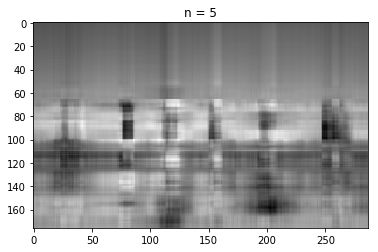

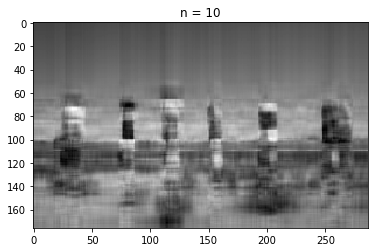

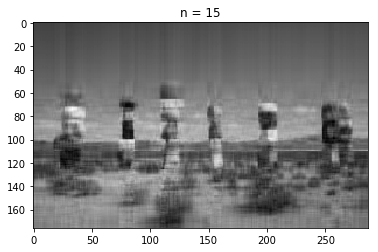

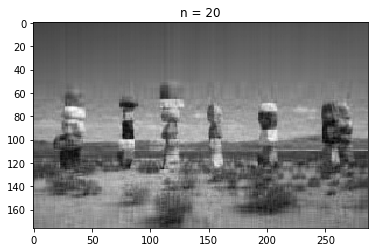

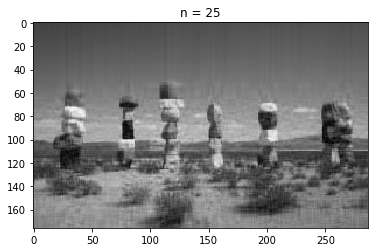

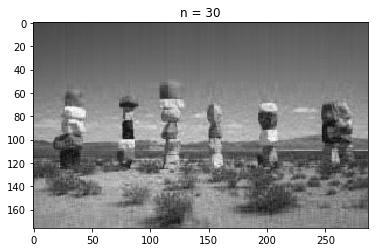

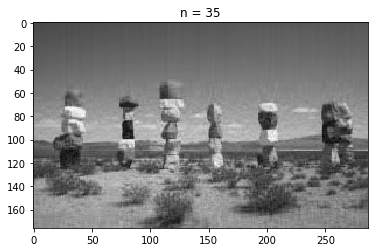

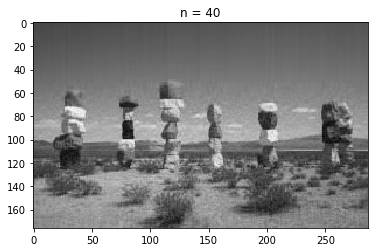

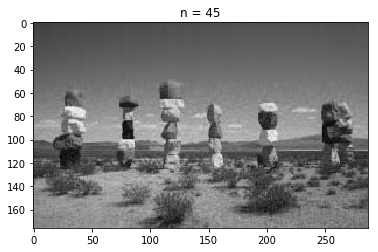

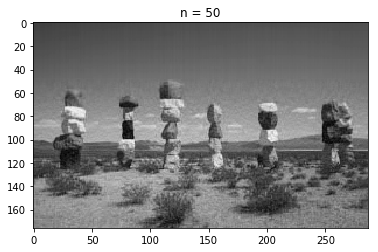

In [7]:
for i in range(5, 51, 5):
    reconstimg = np.matrix(U[:, :i]) * np.diag(s[:i]) * np.matrix(V[:i, :])
    plt.imshow(reconstimg, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()